# Finding Heavy Traffic Indicators on I-94

In this project, we will try to determine some indicators that lead to heavy traffic on the I-94 Interstate highway [https://en.wikipedia.org/wiki/Interstate_94]


### Exploring the data

In [29]:
# Read the csv file
import pandas as pd
import numpy as np

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [30]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [31]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [32]:
traffic.shape

(48204, 9)

In [33]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


No null value is present in the data

In [34]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [35]:
traffic.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,61,48204,48204,48204
unique,11,11,38,40575
top,Labor Day,Clouds,sky is clear,2013-05-19 10:00:00
freq,7,15164,11665,6


### Analyzing Traffic Volume

<Axes: ylabel='Frequency'>

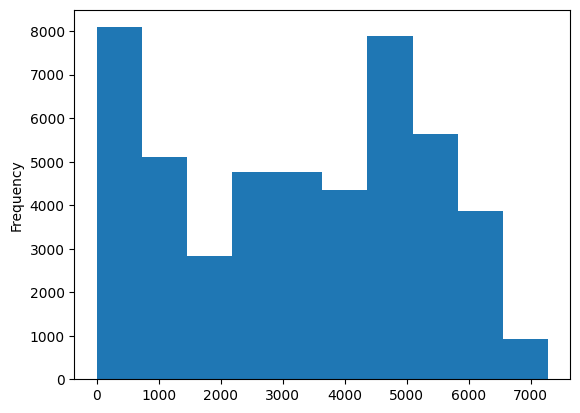

In [36]:
# visualize the distribution of the traffic_volume column
import matplotlib.pyplot as plt
%matplotlib inline 

traffic['traffic_volume'].plot.hist()

In [37]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### A few notes:
- Between 9:00:00 and 23:00:00, the traffic volume varies from the minimum of 0 to the maximum of 7280 cars, with an average of approximately 3260 cars
- About 25% of the time, there were 1193 cars passing the station each hour. On the other hand, about 25% of the time, there were 4933 cars (4 times as much)

--> This leads us to an interesting idea: **nighttime and daytime might influence traffic volume**

### Traffic Volume: Day vs. Night

Let's divide the data into 2 groups:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [38]:
# Get the hour of every instance of the date_time column and isolate daytime and nighttime data
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

daytime = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]


nighttime = traffic.copy()[(traffic["date_time"].dt.hour < 7) | (traffic["date_time"].dt.hour >= 19)]


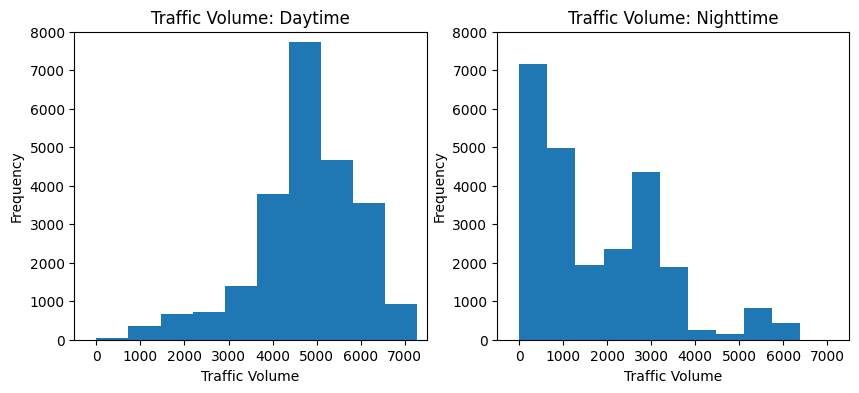

In [39]:
# Compare the traffic volume at night and during day using histograms
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(daytime["traffic_volume"])
plt.xlim(-500, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Daytime')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nighttime["traffic_volume"])
plt.xlim(-500, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Nighttime')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()


In [40]:
daytime["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [41]:
nighttime["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

*Note that:*
- The graph for daytime data is **left skewed** (high frequency is observed for high traffic volume)
- The graph for nighttime data is **right skewed** (high frequency is observed for low traffic volume)

--> We can jump to the conclusion that traffic at night is generally light and heavy traffic is often observed in daytime

As we are trying to determined the indicators for heavy traffic, we will focus on daytime data.

### Time Indicators

One of the possible indicators of heavy traffic is time. Traffic may get busier at certain day, time or month.

Let's analyze and create line plots for those three paramters (month, day of the week, time of day)



In [42]:
# Month
daytime["month"] = daytime["date_time"].dt.month
by_month = daytime.groupby('month')
traffic_monthly = by_month["traffic_volume"]
traffic_mean = traffic_monthly.mean()


# should use daytime.groupby('month').mean() -- apply failed 

print(traffic_mean)

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


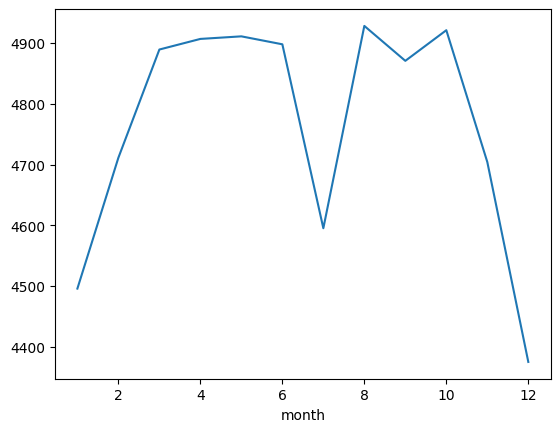

In [43]:
traffic_mean.plot.line()
plt.show()

*Note*: 
- The traffic is heavier during warm time of the year (March to October), with an exception of July
- Traffic seems to be less busy from November to February


Let's take a closer look at how traffic changes in July

In [44]:
daytime['year'] = daytime['date_time'].dt.year
only_july = daytime[daytime['month'] == 7]
july_by_year = only_july.groupby('year')
mean_july_traffic = july_by_year['traffic_volume'].mean()

print(mean_july_traffic)

year
2013    4914.354054
2014    4871.598240
2015    4613.146226
2016    3924.923645
2017    4734.120301
2018    4586.899543
Name: traffic_volume, dtype: float64


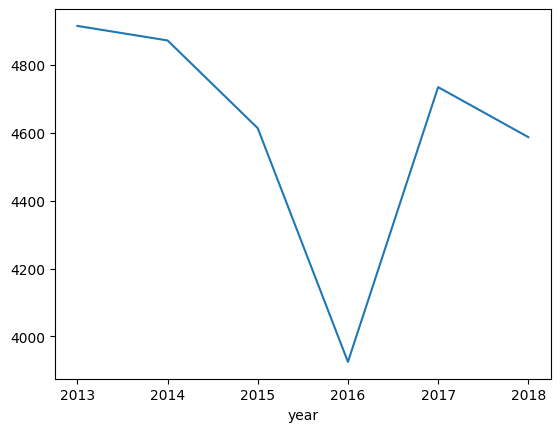

In [45]:
mean_july_traffic.plot.line()
plt.show()

We see that the traffic volume is as high as other warm months during the period from 2013 to 2018, with an exception of 2016.
This can be explained as there was a road construction in July 2016, leading to the high decrease of traffic volume. [https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696]


In [46]:
# Day of the week
daytime['day_of_week'] = daytime['date_time'].dt.dayofweek
group_by_day = daytime.groupby('day_of_week')
mean_by_day = group_by_day['traffic_volume'].mean()
print(mean_by_day)

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


*Note*: Monday is denoted by 0 and ends on Sunday (6)

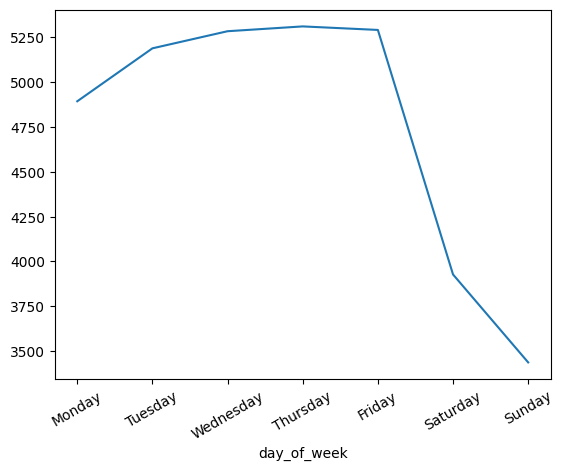

In [47]:
mean_by_day.plot.line()
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 30)
plt.show()

Traffic volume is heavy during weekdays (Monday to Friday) and significantly decreases in the weekend (Saturday and Sunday)

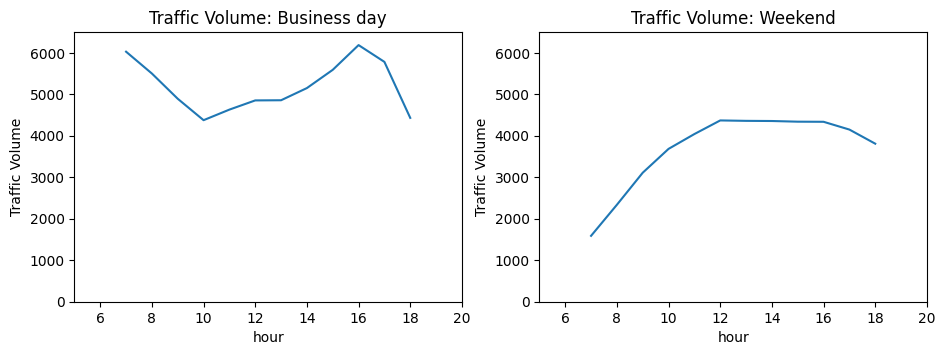

In [48]:
# Time of the day
# Let's consider weekdays and weekend separately

plt.figure(figsize=(11,3.5))

daytime['hour'] = daytime['date_time'].dt.hour
businessday = daytime.copy()[daytime["day_of_week"] < 5]
weekends = daytime.copy()[(daytime["day_of_week"] == 5) | (daytime["day_of_week"] == 6)]

hour_businessday = businessday.groupby('hour')
by_hour_business = hour_businessday['traffic_volume'].mean()

hour_weekends = weekends.groupby('hour')
by_hour_weekends = hour_weekends['traffic_volume'].mean()

plt.subplot(1, 2, 1)
by_hour_business.plot.line()
plt.xlim(5, 20)
plt.ylim(0, 6500)
plt.title('Traffic Volume: Business day')
plt.ylabel('Traffic Volume')


plt.subplot(1, 2, 2)
by_hour_weekends.plot.line()
plt.xlim(5, 20)
plt.ylim(0, 6500)
plt.title('Traffic Volume: Weekend')
plt.ylabel('Traffic Volume')

plt.show()

- On weekdays, the rush hours are during the evening from around 3pm to 5pm, and early in the morning (from 7am to 8am)
- On weekends, traffic is less heavy and only busy in the afternoon (from 12pm to 4pm)

### Time Indicators - Summary:

Traffic is heavy during:
- Warm months (from March to October)
- Business day (Monday to Friday)
- Morning from 7am to 8am, and evening from 3pm to 5pm

### Weather Indicators

There are many columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

Columns temp, rain_1h, snow_1h, and clouds_all are numeric, and weather related columns: weather_main and weather_description.

Let's take a look at the correlation between these numeric columns and the traffic_volume

In [49]:
weather_numeric = daytime[['traffic_volume', 'temp', 'rain_1h', 'snow_1h','clouds_all']]
weather_numeric.corr()['traffic_volume']

traffic_volume    1.000000
temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.128. 

The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

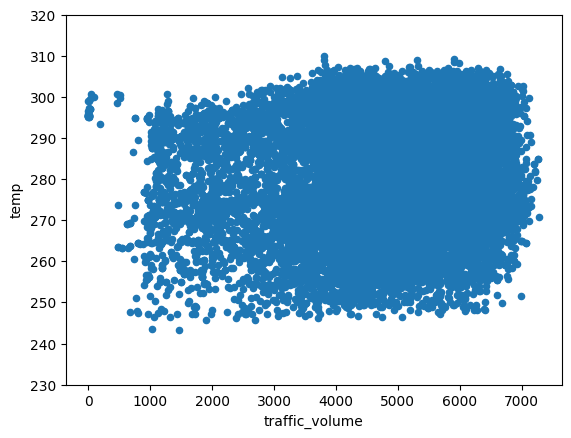

In [50]:
# scatter plot - visualize the correlation between temp and traffic_volume
weather_numeric.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)
plt.show()

Looks like temp is not a solid indicator of high traffic volume

Let's look at the weather related columns: weather_main and weather_description

In [51]:
# weather_main
groupby_weathermain = daytime.groupby('weather_main')
mean_weathermain = groupby_weathermain['traffic_volume'].mean()
print(mean_weathermain)

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64


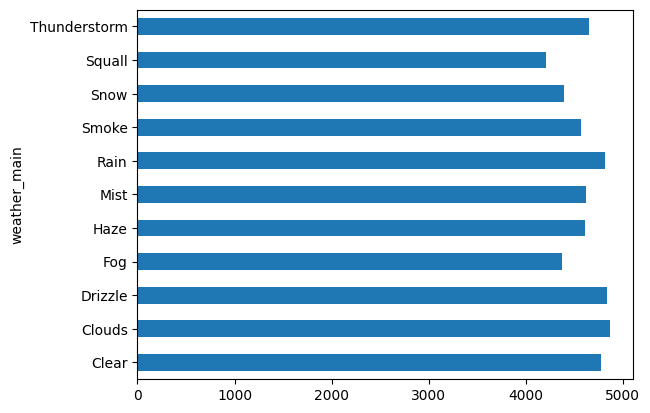

In [52]:
mean_weathermain.plot.barh()
plt.show()

Traffic does not exceed 5000 for any weather types.

In [53]:
# weather_description
groupby_weatherdesc = daytime.groupby('weather_description')
mean_weatherdesc = groupby_weatherdesc['traffic_volume'].mean()
print(mean_weatherdesc)

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

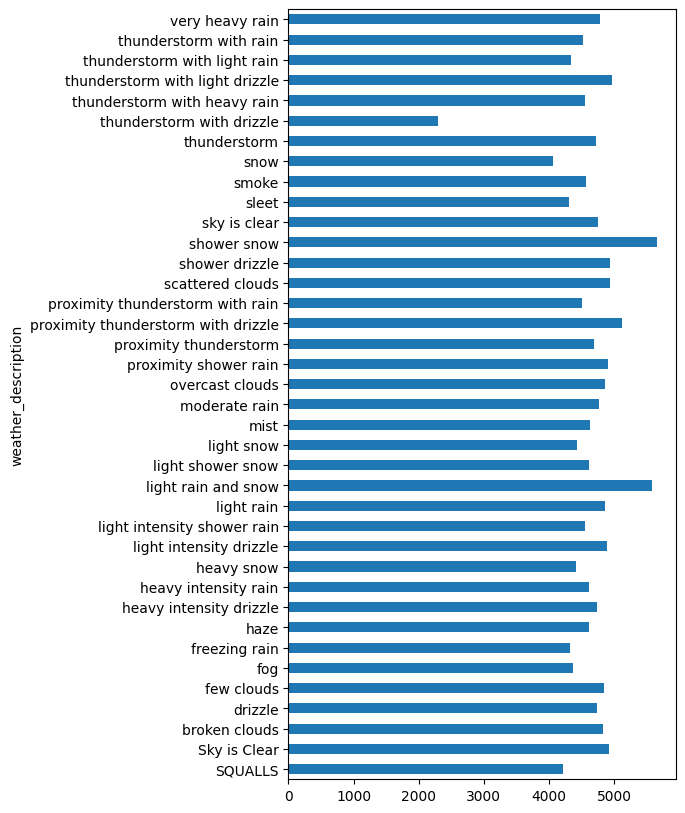

In [54]:
mean_weatherdesc.plot.barh(figsize=(5,10))
plt.show()

Weather types where traffic exceeds 5000:
- light rain and snow 
- proximity thunderstorm with drizzle 
- shower snow  

It's not clear why these weather types have the highest average traffic values as they are bad weather...

## Conclusion

We have found a few indicators for heavy traffic on I-94:
- **Time indicators**: 

    - The traffic is heavier during warm months (March to October), comparing to the cold months (November-February)
    - The traffic is heavier on weekdays compared to weekends
    - On weekdays, the rush hours are around 7am and between 3pm to 5pm in the afternoon
    


- **Weather indicators**: traffic is busiest during weather conditions: light rain and snow, proximity thunderstorm with drizzle, shower snow

